In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Chemin vers tes dossiers : fist, palm, victory
DATA_DIR = "C:/Users/ismai/HandGestureRecognition/data/webcam_gestures"

# 1. Préparation des générateurs avec augmentation de données
datagen = ImageDataGenerator(
    rescale=1./255,          # Normalise les pixels entre 0 et 1
    validation_split=0.2,    # 20% des images pour le test
    rotation_range=20,       # Rotation aléatoire
    zoom_range=0.2,          # Zoom aléatoire
    width_shift_range=0.2,   # Déplacement horizontal
    height_shift_range=0.2,  # Déplacement vertical
    horizontal_flip=False    # Pas de flip car "victory" peut changer de sens
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(64, 64),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(64, 64),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 841 images belonging to 4 classes.
Found 210 images belonging to 4 classes.


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 1)),

    # Bloc 1
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Bloc 2
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Bloc 3
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Classification finale
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5), # Désactive 50% des neurones pour éviter l'overfitting
    tf.keras.layers.Dense(3, activation="softmax") # 3 classes : fist, palm, victory
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [4]:

gestures_list = ["fist", "palm", "victory"]

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(64, 64),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    classes=gestures_list, # <--- ON FORCE LES 3 CLASSES ICI
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(64, 64),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    classes=gestures_list, # <--- ON FORCE LES 3 CLASSES ICI
    subset="validation"
)

Found 841 images belonging to 3 classes.
Found 210 images belonging to 3 classes.


Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9679 - loss: 0.1082 - val_accuracy: 0.3333 - val_loss: 29.8864
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9774 - loss: 0.0744 - val_accuracy: 0.3333 - val_loss: 30.7790
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9822 - loss: 0.0646 - val_accuracy: 0.4143 - val_loss: 27.1838
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9762 - loss: 0.0550 - val_accuracy: 0.4571 - val_loss: 26.8196
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9762 - loss: 0.0732 - val_accuracy: 0.4667 - val_loss: 24.8610
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9822 - loss: 0.0793 - val_accuracy: 0.5000 - val_loss: 22.8682
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9786 - loss: 0.0691 - val_accuracy: 0.5190 - val_loss: 23.1036
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9869 - loss: 0.0525 - val_accuracy: 0.5

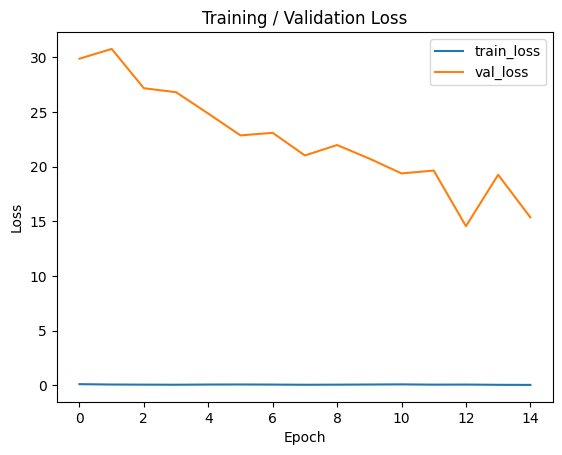

In [9]:
history = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen
)
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Training / Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("training_val_loss.png")
plt.show()


In [10]:
model.save("C:/Users/ismai/HandGestureRecognition/model.h5")

